<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Batch_calibration/blob/main/BPL_TEST2_Batch_calibration_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Batch_calibration script with PyFMI ver 2.7.4

The key library PyFMI v2.7.4 is installed and downgrading is done Numpy v1.19.1. To simplify this we first install conda.

After the installation a small application BPL_TEST2_Batch_calibration is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.6 LTS
Release:	18.04
Codename:	bionic


In [2]:
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh 
!chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local 
import sys 
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-20 10:57:15--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   107MB/s    in 0.9s    

2022-09-20 10:57:16 (107 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

In [4]:
!conda update -n base -c defaults conda --yes

Solving environment: \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2022.07.19 |       h06a4308_0         124 KB
    certifi-2022.9.14          |   py37h06a4308_0         155 KB
    cffi-1.15.1                |   py37h74dc2b5_0         227 KB
    conda-4.14.0               |   py37h06a4308_0         909 KB
    conda-package-handling-1.9.0|   py37h5eee18b_0         887 KB
    cryptography-37.0.1        |   py37h9ce1e76_0         1.3 MB
    cytoolz-0.11.0             |   py37h7b6447c_0         328 KB
    ld_impl_linux-64-2.38      |       h1181459_1         654 KB
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgomp-11.2.0             |       h1234567_1  

In [5]:
!conda --version
!python --version

conda 4.14.0
Python 3.7.13


In [6]:
!conda install -c conda-forge pyfmi==2.7.4 --yes # Install the key package

Solving environment: - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [7]:
!conda install numpy=1.19.1 --yes # Need to downgrade numpy

Solving environment: \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - numpy=1.19.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    numpy-1.19.1               |   py37h30dfecb_0          21 KB
    numpy-base-1.19.1          |   py37h75fe3a5_0         4.1 MB
    -----------------------------------

Now specific installation and the run simulations. Start with connecting to Github. Then upload the four files:

* FMU - BPL_TEST2_Batch_linux_jm_cs.fmu
* Setup-file - BPL_TEST2_Batch_explore.py



In [8]:
# Filter out DepracationWarnings for 'np.float as alias' is needed - wish I could make filter more narrow 
import warnings
warnings.filterwarnings("ignore")

In [10]:
%%bash 
git clone https://github.com/janpeter19/BPL_TEST2_Batch_calibration

Cloning into 'BPL_TEST2_Batch_calibration'...


In [11]:
%cd BPL_TEST2_Batch_calibration

/content/BPL_TEST2_Batch_calibration


# BPL_TEST2_Batch_calibration - demo

This notebook shows the possibilities for calibration of the model BPL_TEST2_Batch using scipy.optimize.minimize() routine. There are several different methods to choose between. In this notebook we work with simulated data.

The text-book model of batch cultivation we simulate is the following where $S$ is substrate, $X$ is cell concentration, and $V$ is volume of the broth

$$
\eqalign{
{d(VS) \over dt} =& -q_S(S) \cdot VX \cr 
{d(VX) \over dt} =& \mu(S) \cdot VX }
$$

and where specific cell growth rate $\mu$ and substrate uptake rate $q_S$ are

$$
\mu(S) = Y \cdot q_S(S)
$$

$$
q_S(S) = q_S^{max} {S \over K_s + S}
$$

where $Y$ is the yield, $q_S^{max}$ is the maximal specific substrate uptake rate and $K_s$ is the corresponding saturation constant.

The parameter estimation is done with optimization methods that only require evaluation of the missmatch between simulation with given parameters and data. At start the allowed range for each parameter is given. The method used for optimization is SLSQP but can easily be changed [1].

In the near future the FMU may provide first derivative gradient informaion, that will make it possible to choose corresponding method of minimize() for improved performance. This possibility is related to the upgrade to the FMI-standard ver 3.0 for the Modelica compiler.  

The Python package PyFMI [2] that is the base for FMU-explore has a simplified built-in
functionality for parameter estimation that also use scipy.optimize.minimize(). However, there is estimated and the purpose seems to only address smaller examples. Therefore we here define a no possibility to include parameter changes to the compiled model that should not be
Python function evaluation() that facilitate the formulation of the parameter estimation and
bring flexibility to choice of optimization method.

In [12]:
run -i BPL_TEST2_Batch_explore.py

Linux - run FMU pre-comiled JModelica 2.4

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [13]:
# Adjust the size of diagrams
plt.rcParams['figure.figsize'] = [15/2.54, 12/2.54]

## 1 Generate data later used for parameter estimation

In [15]:
import pandas as pd

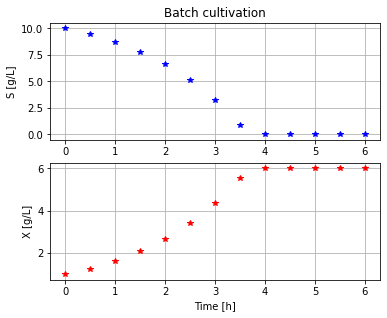

In [16]:
# Data generated
simulationTime = 6.0
par(Y=0.50, qSmax=1.00, Ks=0.1)
init(V_0=1.0, VS_0=10, VX_0=1.0)
newplot(plotType='Demo_2')
opts['ncp'] = 12
simu(simulationTime)

In [17]:
# Store data in a DataFrame for later use
data = pd.DataFrame(data={'time':sim_res['time'], 'X':sim_res['bioreactor.c[1]'], 'S':sim_res['bioreactor.c[2]']})
data

,time,X,S
0,0.0,1.000000,1.000000e+01
1,0.5,1.280773,9.438453e+00
2,1.0,1.640079,8.719842e+00
3,1.5,2.099615,7.800770e+00
4,2.0,2.686770,6.626459e+00
5,2.5,3.435479,5.129043e+00
6,3.0,4.385325,3.229350e+00
7,3.5,5.559252,8.814967e-01
8,4.0,6.000000,1.048673e-08
9,4.5,6.000000,-6.547559e-11


## 2 Simulation with initial guess of parameters compared with data

Here we define the parameters that should be estimated and specify allowed ranges. 
Nominal parameters are chosen as the mid-point of the allowed parameter range. 

Simulation with these nominal parameter set and compare with data give an idea of who well the model fit data.

In [18]:
# Parameters to be estimated using parDict names and their bounds
parEstim = ['Y', 'qSmax', 'Ks']
parBounds = [(0.4, 0.8), (0.7, 1.3), (0.05, 0.20)]
parEstim_0 = [np.mean(parBounds[k]) for k in range(len(parBounds))]

In [19]:
# Parameters to be estimated using parDict names and their bounds
parEstim = ['Y', 'qSmax', 'Ks']
parBounds = [(0.4, 0.8), (0.7, 1.3), (0.05, 0.20)]
parEstim_0 = [np.mean(parBounds[k]) for k in range(len(parBounds))]

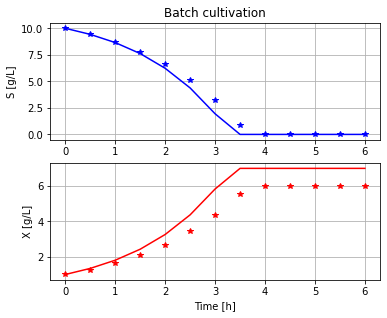

In [20]:
# Simulation with nominal parameters
newplot(plotType='Demo_1')
par(Y=parEstim_0[0], qSmax=parEstim_0[1], Ks=parEstim_0[2])
simu(simulationTime)

# Show data
ax1.plot(data['time'], data['S'],'b*')
ax2.plot(data['time'], data['X'],'r*')
plt.show()

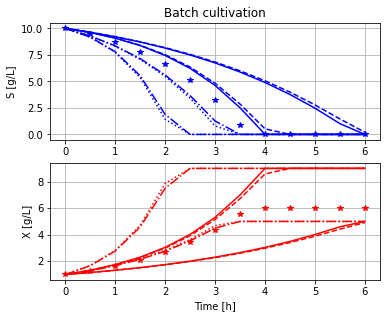

In [21]:
# Simulation over the parameter ranges given
newplot(plotType='Demo_1')
for Y_value in parBounds [0]:
    for qSmax_value in parBounds[1]:
        for Ks_value in parBounds[2]:
            par(Y=Y_value, qSmax=qSmax_value, Ks=Ks_value)
            simu(simulationTime)
            
# Show data
ax1.plot(data['time'], data['S'],'b*')
ax2.plot(data['time'], data['X'],'r*')
plt.show()

Simulation over the diferent parameter combinations of the parameter bounds shows that data is "covered" and we have good hope to find a parameter combination that fits data well.

## 3 Parameter estimation

Here we use the scipy.optimize.minimize() procedure which contain a family of different methods [1].
Since we has chosen to work with bounds on the parameters to be estimated there are only three methods to choose between. Here the method Sequential Least SQuares Programming SLSQP is chosen.

Note that we in the definition of evaluation() make use of PyFMI-functions to administrate the simulation parameters as well as running it, instead of using the simplified simu() function we are used to.

In [22]:
# Optimization routine import
import scipy.optimize

In [23]:
# Parameters to be estimated using parDict names and their bounds
extra_args = (parEstim, data, fmu_model, simulationTime, parDict, parLocation)

In [24]:
# Modified evaluation function tailored for Python optimization algorithms
def evaluation(x, parEstim, data=data, fmu_model=fmu_model, simulationTime=simulationTime,
                parDict=parDict, parLocation=parLocation):
    """The parameter list is tailored for scipy optimization algorithms interface, 
       where the first parameter x is an array with parameters that are tuned 
       and evalauted and parEstim is a list of the names of these parameters."""
      
    # Load model
    global model
    if model is None:
        model = load_fmu(fmu_model)
    model.reset()
   
    # Change parameters and initial values from default
    for i, p in enumerate(parEstim): model.set(parLocation[p], x[i])
    for p in set(parDict)-set(parEstim): model.set(parLocation[p], parDict[p])
      
    # Simulation options
    opts = model.simulate_options()
    opts['ncp'] = 12
    opts['result_handling'] = 'memory'
    opts['silent_mode'] = True
   
    # Simulate
    sim_res = model.simulate(start_time=0.0, final_time=simulationTime, options=opts)
   
    # Calculate loss function V
    V={}
    V['X'] = np.linalg.norm(data['X'] - np.interp(data['time'], sim_res['time'], sim_res['bioreactor.c[1]']))
    V['S'] = np.linalg.norm(data['S'] - np.interp(data['time'], sim_res['time'], sim_res['bioreactor.c[2]']))
  
    return V['X'] + V['S']

In [25]:
import time

In [26]:
# Run minimize()
start_time = time.time()
result = scipy.optimize.minimize(evaluation, x0=parEstim_0, args=extra_args, 
                                 method='SLSQP', bounds=parBounds, options={"disp":True})
print('CPU-time =', time.time()-start_time)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.00023713755940405281
            Iterations: 21
            Function evaluations: 114
            Gradient evaluations: 21
CPU-time = 0.2662527561187744


In [27]:
result

     fun: 0.00023713755940405281
     jac: array([ 5.38155632,  2.80042532, -0.71099749])
 message: 'Optimization terminated successfully'
    nfev: 114
     nit: 21
    njev: 21
  status: 0
 success: True
       x: array([0.49999989, 0.99996316, 0.09977226])

The estimated parameters result.x are very close to the original values and no surprise.

Test of the three methods available that handle parameter bounds: TNC, L-BFGS-B and SLSQP. It turns out that SLSQP is by far the fastest. It is 3 times faster than L-BFGS-B which is faster than TNC. Can be that SLSQP is less robust though. The nit (number of iterations does not differ that much though: 24 vs 30. The nfev (number of function evaluations) is perhaps more important 127 vs 256. A more precise timer function is likely timeit for this short times.

The Nelder-Mead algorithm has a good reputation to be very robust, but more slow,  and with this method we cannot have bounds on the parameters.

## 4 Simulation with estimated parameters compared with data

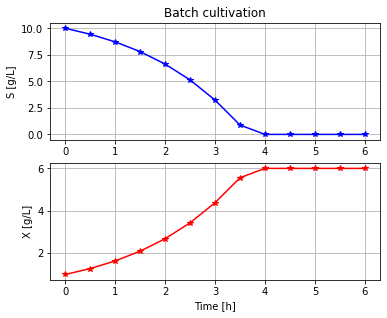

In [28]:
newplot(plotType='Demo_1')
par(Y=result.x[0], qSmax=result.x[1], Ks=result.x[2])
simu(simulationTime)

# Show data
ax1.plot(data['time'], data['S'],'b*')
ax2.plot(data['time'], data['X'],'r*')
plt.show()

In [29]:
# The estimated parameters are
for i in range(len(parEstim)): print(parEstim[i],':', result.x[i])

Y : 0.49999989477908324
qSmax : 0.9999631628019081
Ks : 0.09977225678489653


## 5 Analysis of the loss function

The problem is small and analysis of the loss function brings some insight. From the diagram above showing parameter sweep over combinations min- and max-parameters we see that the parameter $K_s$ has little influence. Let use set that a fixed value and then plot the loss function in the parameters $Y$ and $qSmax$.  We do this by go through all the parametera combinations and evaluate each of them.

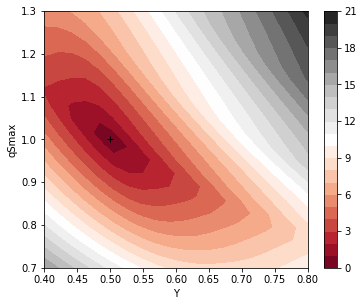

In [30]:
# Sweep through Y and qSmax variation and store the value of the loss-function for each
nY = 20
nqSmax = 20
V = np.zeros((nY, nqSmax))
             
Y = np.linspace(parBounds[0][0],parBounds[0][1],nY)
qSmax = np.linspace(parBounds[1][0],parBounds[1][1],nqSmax)

for j in range(nY):
    for k in range(nqSmax):
        V[k,j] = evaluation([Y[j], qSmax[k], 0.1], parEstim)

# Contour plot
plt.figure()
plt.clf
plt.subplot(1,1,1)
plt.contourf(Y, qSmax, V, 20, cmap='RdGy')
plt.plot(result.x[0], result.x[1],'k+')
plt.colorbar()
plt.ylabel('qSmax')
plt.xlabel('Y')
plt.show()

We see the following in the contour diagram of the loss function simplified:
* The minima is unique in the range of parmaters we study. This is good news.
* The contour plot is ellipsoid and rather narrow. The more narrow the ellipsoid the more difficult and more time it takes to converge to the minima.
* The direction of the ellipsoid axis indicate the correlation you may get between the two parameters during the minimization process.

Note that the form of the contour plot change with the parameters (and initial values) of the actual proces.
You can see the impact by changing the parameters in "cell # 4" where data is generated and then just choose to run that cell and the cells below. No need to restart the notebook.

## 6 Summary

A choice was made to work with allowed ranges of parameters to be estimated and a start value was defined as the center point in this parameter space. There are only three methods available in optimize.minimize() that can handle bounds on parameters.

An evaluation() function was created that define how the difference beween simulation and data is measured. The function is rather transparent and easy to modify and you may want to change weight on the loss in S and X, for instance. Here they have so far equal weight. 

The FMU-explore workspace dictionaries partDict[] and parLocation[] are useful also here and simplify the code for the evaluation() function. But we also use the detailed PyFMI-functions to administrate and set parameters of the actual simulation. 

The call optimize.minimize() has several parameters and can easily be modified, for instance change of method.

The estimated parameters were close to perfect!

The contour plot of the simplified loss function shows that the minima is unique and should
not be difficult too difficut to obtain.

## 7 References

[1] Scipy Reference guide on optimize.minimize()
[here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html?highlight=minimize)

[2] Andersson, C., Åkesson, J., Fuhrer C. : "PyFMI: A Python package for simulation of coupled dynamic models with the functional mock-up interface", Centre for Mathematical Sciences, Lund University, Report LUTFNA-5008-2016, 2016. 

## Appendix

In [ ]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'liquidphase', 'monitor', 'MSL', 'sensor']


In [ ]:
describe('MSL')

MSL: 3.2.2 build 3 - used components: Noise.NormalNoise


In [31]:
scipy.__version__

'1.7.3'

In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.7.13
 -PyFMI: 2.7.4
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL_TEST2.BatchWithNoise
 -Generated: 2022-09-09T12:20:39
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.1.0 beta
 -Interaction: FMU-explore ver 0.9.3
